In [125]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MultipleLocator, MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Modeling with a 1-Stage Classification System

In this step we'll load the cleaned data set and then perform the modeling steps.

In [126]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [127]:
# Perform Logistic Regression on the data set

# Numerical Predictors
# BMI
# Age
# Income

# Categorical Predictors
# HighBP
# HighChol
# CholCheck
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# DiffWalk
# Sex
# Education
# MentHlth
# PhysHlth

# Target
# Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "Age", "Income"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)
dummy_MentHlth = pd.get_dummies(df["MentHlth"] , drop_first=True)
dummy_PhysHlth = pd.get_dummies(df["PhysHlth"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education], axis=1)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()

# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

#Model parameters
desired_cs = np.logspace(-3, 2, 30)
desired_cv = 10

In [128]:
# Logistic Regression with OVR (One-vs-t)
ovr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, class_weight='balanced')
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
print("\nOvR Classification Report:")
print(classification_report(y_test, y_pred_ovr))

/Users/yaroslawbagriy/Dev/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



OvR Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.79     38012
         1.0       0.04      0.18      0.06       926
         2.0       0.35      0.67      0.46      7019

    accuracy                           0.67     45957
   macro avg       0.44      0.51      0.44     45957
weighted avg       0.83      0.67      0.73     45957



In [129]:
# Logistic Regression with Multinomial (One-vs-Reference)
multi_model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)
print("\nMultinomial Classification Report:")
print(classification_report(y_test, y_pred_multi))


Multinomial Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     38012
         1.0       0.03      0.30      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.63     45957
   macro avg       0.45      0.51      0.42     45957
weighted avg       0.84      0.63      0.70     45957



In [130]:
# Logistic Regression with Multinomial (One-vs-Reference) and Cross-Validation
cv_model = LogisticRegressionCV(
    Cs=desired_cs,
    cv=desired_cv,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
cv_model.fit(X_train, y_train)
y_pred_cv = cv_model.predict(X_test)
print("\nCross-Validated Logistic Regression (Multinomial) Report:")
print(classification_report(y_test, y_pred_cv))


Cross-Validated Logistic Regression (Multinomial) Report:
              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     38012
         1.0       0.03      0.30      0.06       926
         2.0       0.36      0.59      0.45      7019

    accuracy                           0.63     45957
   macro avg       0.45      0.52      0.43     45957
weighted avg       0.84      0.63      0.71     45957



# Plot ROC/AUC curves for 1-Stage Logistic Regression Model with Original Data

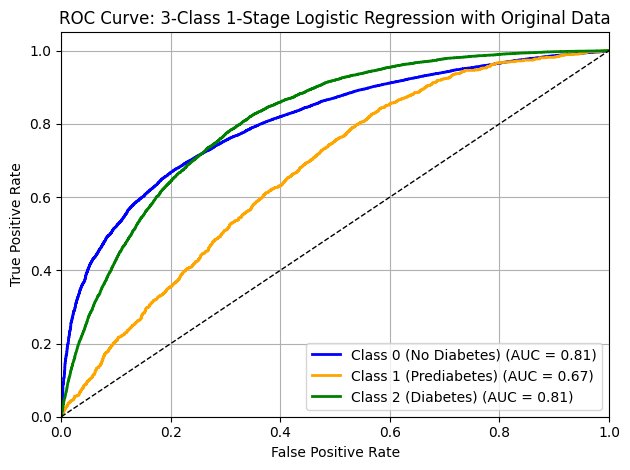

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predict probabilities for each class (0, 1, 2)
y_score = cv_model.predict_proba(X_test)  # shape: (n_samples, 3)

# Binarize true labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # shape: (n_samples, 3)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'orange', 'green']
labels = ['Class 0 (No Diabetes)', 'Class 1 (Prediabetes)', 'Class 2 (Diabetes)']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: 3-Class 1-Stage Logistic Regression with Original Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


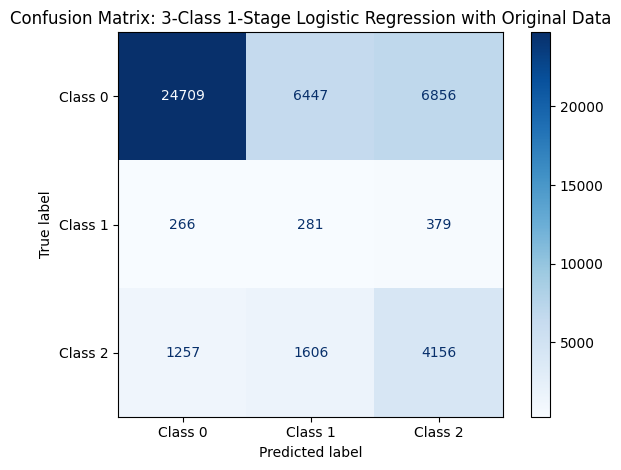

In [132]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_cv, labels=[0, 1, 2])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' = integer display
plt.title("Confusion Matrix: 3-Class 1-Stage Logistic Regression with Original Data")
plt.grid(False)
plt.tight_layout()
plt.show()

# Logistic Regression Modeling with a 2-Stage Classification System

In this section we're going to try a 2-stage classification system to see if we can improve our models classification report.

Steps to take:

**1. Merge class 1 and class 2 into a single combined class (binary classification)**

- Class 0 = "No Diabetes"

- Class 1 = "Yes Diabetes or Pre-Diabetes"

**2. Train a first logistic regression model to separate No Diabetes and Diabetes (including prediabetes)**

**3. Train a second model only on the class 1 and class 2 group**

**4. Predict whether it's really class 1 (prediabetes) or class 2 (diabetes)**



In [133]:
# Merge Class 1 and 2 into single class
y = pd.Series(y)
y_binary = y.copy()
y_binary[y_binary == 2] = 1

# Split data into training and test data after standardization
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Convert y back to Series
y_train_binary = pd.Series(y_train_binary, index=X_train.index)
y_test_binary = pd.Series(y_test_binary, index=X_test.index)

# Fix column names
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Train first Model: 0 vs (1+2)
first_model = LogisticRegressionCV(
    Cs=desired_cs,
    cv=desired_cv,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)
first_model.fit(X_train, y_train_binary)


# Predict first stage
y_pred_binary = first_model.predict(X_test)

print("\nFirst Stage Classification Report (class 0 vs class 1+2):")
print(classification_report(y_test_binary, y_pred_binary))

# Predict second stage for class 1 from the binary model, then reclassify into class 1 or class 2

# Find which test samples were predicted as the combined diabetes group
# np.where always returns a tuple, get the 0th index for the actual array
indices_pred_diabetes = np.where(y_pred_binary == 1)[0]

# Subset X_test and original true labels (y_test) to only the samples predicted as diabetes
X_test_diabetes = X_test.iloc[indices_pred_diabetes]
# Backwards translate from binary to the original set
y_test_full = y.iloc[y_test_binary.index]  # Go back to original labels 0/1/2
y_test_diabetes = y_test_full.iloc[indices_pred_diabetes]

# Only keep the real class 1 and 2
X_test_diabetes = X_test_diabetes[(y_test_diabetes == 1) | (y_test_diabetes == 2)]
y_test_diabetes = y_test_diabetes[(y_test_diabetes == 1) | (y_test_diabetes == 2)]

# Train a second model to distinguish 1 vs 2
y_train_full = y.loc[X_train.index]  # Must match original y to X_train
mask_train_diabetes = (y_train_binary == 1)
X_train_diabetes = X_train[mask_train_diabetes]
y_train_diabetes = y_train_full[mask_train_diabetes]

second_model = LogisticRegressionCV(
    Cs=desired_cs,
    cv=desired_cv,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)
second_model.fit(X_train_diabetes, y_train_diabetes)

# Predict on the subset
y_pred_second_stage = second_model.predict(X_test_diabetes)

print("\nSecond Stage Classification Report (class 1 vs class 2):")
print(classification_report(y_test_diabetes, y_pred_second_stage))


First Stage Classification Report (class 0 vs class 1+2):
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     38012
         1.0       0.35      0.75      0.48      7945

    accuracy                           0.72     45957
   macro avg       0.64      0.73      0.64     45957
weighted avg       0.83      0.72      0.75     45957


Second Stage Classification Report (class 1 vs class 2):
              precision    recall  f1-score   support

         1.0       0.14      0.32      0.19       595
         2.0       0.91      0.77      0.84      5331

    accuracy                           0.73      5926
   macro avg       0.52      0.55      0.51      5926
weighted avg       0.83      0.73      0.77      5926



# Save final prediction data to results directory to be used in ensemble voting

In [134]:
# Start from binary predictions
y_pred_final = y_pred_binary.copy()

# Get original indices of test set where model predicted diabetes
pred_diabetes_indices = np.where(y_pred_binary == 1)[0]

# Get matching original test set labels
y_test_full = y.iloc[y_test_binary.index]  # back to 0/1/2 labels
y_test_diabetes = y_test_full.iloc[pred_diabetes_indices]

# Only keep samples that are truly class 1 or 2
valid_indices_mask = (y_test_diabetes == 1) | (y_test_diabetes == 2)
final_indices_to_update = pred_diabetes_indices[valid_indices_mask]

# Assign back second-stage predictions
for idx_in_list, idx in enumerate(final_indices_to_update):
    y_pred_final[idx] = y_pred_second_stage[idx_in_list]

# Save test data to be later used in the ensemble voting
os.makedirs("results", exist_ok=True)
np.save("results/y_pred_lr.npy", y_pred_final)

# Plot ROC/AUC curves for 2-Stage Logistic Regression Model with Original Data

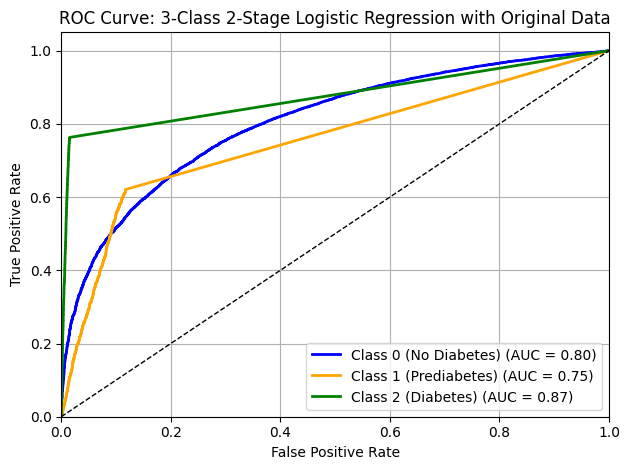

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get probabilities from first stage
prob_first_stage = first_model.predict_proba(X_test)[:, 1]  # P(class 1+2)

# Get probabilities from second stage (only for predicted diabetes)
prob_second_stage = second_model.predict_proba(X_test_diabetes)  # shape: (n_samples, 2)

# Build combined probability array for 3 classes
n_samples = len(X_test)
y_score = np.zeros((n_samples, 3))  # columns = [class 0, class 1, class 2]

# Class 0: 1 - prob_first_stage
y_score[:, 0] = 1 - prob_first_stage

# Class 1 and 2: only update where binary model predicted diabetes
# Get actual test indices for those samples
diabetes_indices = np.where(y_pred_binary == 1)[0]

# Filter to valid diabetes indices (1 or 2)
y_test_full = y.loc[y_test_binary.index]
valid_indices_mask = (y_test_full.iloc[diabetes_indices] == 1) | (y_test_full.iloc[diabetes_indices] == 2)
final_indices_to_update = diabetes_indices[valid_indices_mask]

# Update y_score with second-stage probabilities
for i, idx in enumerate(final_indices_to_update):
    diabetes_prob = prob_first_stage[idx]
    y_score[idx, 1] = diabetes_prob * prob_second_stage[i, 0]  # class 1
    y_score[idx, 2] = diabetes_prob * prob_second_stage[i, 1]  # class 2

# Get labels
y_true = y.loc[y_test_binary.index]  # original 0/1/2 labels
y_bin = label_binarize(y_true, classes=[0, 1, 2])  # shape: (n_samples, 3)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'orange', 'green']
labels = ['Class 0 (No Diabetes)', 'Class 1 (Prediabetes)', 'Class 2 (Diabetes)']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: 3-Class 2-Stage Logistic Regression with Original Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

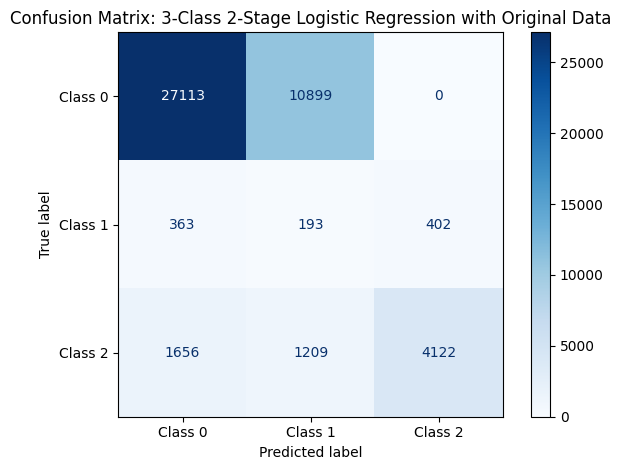

In [136]:
cm = confusion_matrix(y_test_full, y_pred_final, labels=[0, 1, 2])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' for integer counts
plt.title("Confusion Matrix: 3-Class 2-Stage Logistic Regression with Original Data")
plt.grid(False)
plt.tight_layout()
plt.show()